# Linear Regression

首先把需要用到的包都引入

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

## 读入数据 + 数据清洗

In [41]:
df = pd.read_csv('Data.csv')
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [42]:
df = df.drop(['car_ID'], axis=1)
df.isna().sum()



symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

可以发现，`df` 中并无缺失数据，但是其中有许多字符串类型的数据，我们必须对其进行数值化后才能进行线性回归任务

## 数据预处理

这一部分包括：
1. 数据的数值化
2. 数据可视化，观察线性关系的强弱，并选取一部分数据
3. 训练集与测试集的划分

<AxesSubplot:>

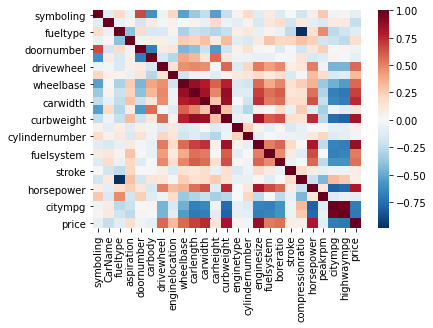

In [43]:
encoder = LabelEncoder()
for i in df.columns:
    if df[i].dtype == object:
        df[i] = encoder.fit_transform(df[i])

sns.heatmap(df.corr(), cmap="RdBu_r")


我们观察 `price` 那一行（或者那一列），然后我们把没啥线性关系的给删掉：
1. `doornumber`
2. `carbody`
3. `cylindernumber`
可能还有其他的，不过我先把这三个删掉(值得一提的是我在最开始就把 `car_ID` 删掉了，因为这个肯定是没啥用的)

In [44]:
df = df.drop(['doornumber', 'carbody', 'cylindernumber'], axis=1)
Y = 0.01 * df['price']
X = 0.01 * df.drop(['price'], axis=1)

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3)

## 实验主体：

实现一个 `LinearRegression` 类，具体要求见 `README.md`

In [ ]:
"""
start Lab 01
"""

## 测试

当然你可以更改这部分代码，写自己的测试程序，但务必完成实验中的要求

In [ ]:
lr = LinearRegression()
lr.fit(train_X, train_Y)

x = [i for i in range(lr.epoch)]

plt.plot(x, lr.loss)
plt.show()

plt.plot(x, lr.gradient)
plt.show()

print(mse(lr.predict(test_X), test_Y))
print(R_2(lr.predict(test_X), test_Y))